# **Analysis of U.S. airline routes and fares from 1993-2024**


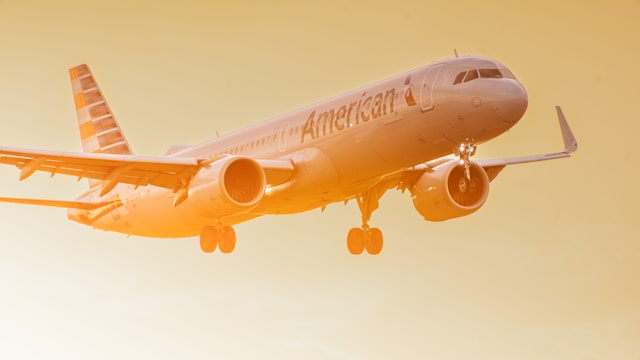


The U.S. airline industry has undergone significant changes over the last three decades due to economic shifts, market competition, and changing passenger preferences. To stay competitive, airlines must understand how fares, demand, and market share have evolved from 1993 to 2024. Analyzing these trends can help airlines optimize routes, adjust pricing, and target underserved markets.

This analysis aims to examine trends in U.S. airline routes and fares from 1993-2024, focusing on how fares, passenger volumes, and market competition have changed. It will quantify the effects of carrier market share, route distance, and fare competitiveness on passenger demand. The report will provide actionable insights to help airlines optimize profitability and pricing strategies.

**By:** [Akash Patel](https://www.linkedin.com/in/akashtheanalyst/), September 2024

[Data Source From Kaggle](https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024)

## **Import libraries and csv file**

In [ ]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Capstone 2/US Airline Flight Routes and Fares 1993-2024.csv') # loading the dataset

<ipython-input-2-d23e408dfbf6>:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Capstone 2/US Airline Flight Routes and Fares 1993-2024.csv') # loading the dataset


In [ ]:
df_copy = df.copy() # copying the data incase needed

# **Understanding the Data**

---



In [ ]:
df.head(3) # display first few rows

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL


In [ ]:
df.info() # checking for data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [ ]:
df.describe( ) # statistics of number columns

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


In [ ]:
df.isnull().sum() # checking for missing values

,0
tbl,0
Year,0
quarter,0
citymarketid_1,0
citymarketid_2,0
city1,0
city2,0
airportid_1,0
airportid_2,0
airport_1,0


In [ ]:
df.nunique() # Checking unique values in each column

,0
tbl,2
Year,31
quarter,4
citymarketid_1,141
citymarketid_2,128
city1,141
city2,128
airportid_1,188
airportid_2,173
airport_1,187


In [ ]:
df.Year.unique() # Checking unique values in 'year'

array([2021, 2022, 2010, 1998, 2009, 1993, 2007, 2003, 2005, 2014, 2001,
       2002, 2011, 1999, 2012, 2013, 1997, 2006, 1994, 1996, 2004, 2000,
       2008, 2019, 2015, 2017, 2016, 2023, 2018, 2020, 2024])

# **Preparing the Data**

---



In [ ]:
df = df.drop(columns=['airportid_1', 'airportid_2', 'Geocoded_City1', 'Geocoded_City2']) # Drop unnecessary columns

### Drop Missing Values and Renaming Columns

In [ ]:
df = df.dropna() # Drop missing values

In [ ]:
# Rename columns to more appropriate names
df = df.rename(columns={
    'tbl': 'TableID',
    'Year': 'Year',
    'quarter': 'Quarter',
    'citymarketid_1': 'Origin_City_Market_ID',
    'citymarketid_2': 'Destination_City_Market_ID',
    'city1': 'Origin_City',
    'city2': 'Destination_City',
    'airport_1': 'Origin_Airport_Code',
    'airport_2': 'Destination_Airport_Code',
    'nsmiles': 'Distance_Miles',
    'passengers': 'Passengers',
    'fare': 'Average_Fare',
    'carrier_lg': 'Largest_Carrier_Code',
    'large_ms': 'Largest_Carrier_Market_Share',
    'fare_lg': 'Largest_Carrier_Avg_Fare',
    'carrier_low': 'Lowest_Fare_Carrier_Code',
    'lf_ms': 'Lowest_Fare_Carrier_Market_Share',
    'fare_low': 'Lowest_Fare',
    'tbl1apk': 'Route_ID'
})

df.columns # Verify the renamed columns

Index(['TableID', 'Year', 'Quarter', 'Origin_City_Market_ID',
       'Destination_City_Market_ID', 'Origin_City', 'Destination_City',
       'Origin_Airport_Code', 'Destination_Airport_Code', 'Distance_Miles',
       'Passengers', 'Average_Fare', 'Largest_Carrier_Code',
       'Largest_Carrier_Market_Share', 'Largest_Carrier_Avg_Fare',
       'Lowest_Fare_Carrier_Code', 'Lowest_Fare_Carrier_Market_Share',
       'Lowest_Fare', 'Route_ID'],
      dtype='object')

### Modifying column values and creating new columns

In [ ]:
df['TableID'].unique() # Checking unique values in 'TableID

array(['Table1a', 'Table 1a'], dtype=object)

In [ ]:
df['TableID'] = df['TableID'].replace('Table 1a', 'Table1a') # Replace 'Table 1a' with 'Table1a'

df['TableID'].unique() # Verify the change

array(['Table1a'], dtype=object)

In [ ]:
# Remove "(Metropolitan Area)" from Origin_City and Destination_City columns
df['Origin_City'] = df['Origin_City'].str.replace(' \(Metropolitan Area\)', '', regex=True)
df['Destination_City'] = df['Destination_City'].str.replace(' \(Metropolitan Area\)', '', regex=True)

df[['Origin_City', 'Destination_City']].head() # Verify the changes

,Origin_City,Destination_City
0,"Allentown/Bethlehem/Easton, PA","Tampa, FL"
1,"Allentown/Bethlehem/Easton, PA","Tampa, FL"
2,"Albuquerque, NM","Dallas/Fort Worth, TX"
3,"Albuquerque, NM","Dallas/Fort Worth, TX"
4,"Albuquerque, NM","Phoenix, AZ"


In [ ]:
df['Fare_per_Mile'] = df['Average_Fare'] / df['Distance_Miles'] # Create a new column for Fare per Mile
df[['Fare_per_Mile','Average_Fare','Distance_Miles']].head()

,Fare_per_Mile,Average_Fare,Distance_Miles
0,0.083948,81.43,970
1,0.215392,208.93,970
2,0.318207,184.56,580
3,0.314897,182.64,580
4,0.539970,177.11,328


In [ ]:
yearly_data = df.groupby('Year').agg({
    'Passengers': 'sum',
    'Distance_Miles': 'sum',
    'Average_Fare': 'mean',
    'Fare_per_Mile': 'mean'
}).reset_index()

yearly_data.head(35)

,Year,Passengers,Distance_Miles,Average_Fare,Fare_per_Mile
0,1993,1538123,11142532,212.823042,0.248084
1,1994,397639,2716780,215.698258,0.244856
2,1996,2001616,10100439,202.443948,0.234127
3,1997,2141358,9953229,206.226955,0.244761
4,1998,2176741,9994591,208.694681,0.247808
5,1999,2322840,10086182,208.787041,0.245776
6,2000,2451166,9946255,217.779298,0.254362
7,2001,2227580,10038447,199.939150,0.239142
8,2002,2163044,10057678,193.162309,0.228467
9,2003,2195068,10084360,196.300227,0.232933


In [ ]:
route_data = df.groupby(['Origin_City', 'Destination_City']).agg({
    'Passengers': 'sum',
    'Distance_Miles': 'sum',
    'Average_Fare': 'mean',
    'Fare_per_Mile': 'mean'
}).reset_index()

route_data.head(5)

,Origin_City,Destination_City,Passengers,Distance_Miles,Average_Fare,Fare_per_Mile
0,"Albany, NY","Chicago, IL",32594,169182,210.854316,0.291638
1,"Albany, NY","Detroit, MI",320,1952,152.407500,0.312310
2,"Albany, NY","Fort Myers, FL",108,1204,166.790000,0.138530
3,"Albany, NY","Las Vegas, NV",818,6711,181.123333,0.080967
4,"Albany, NY","Los Angeles, CA",19462,1006710,288.482132,0.116912


# **Analyzing the Data**

---



### Year over Year changes for fare, passengers, and miles

In [ ]:
yearly_data['Fare_YoY_Change'] = yearly_data['Average_Fare'].pct_change() * 100 # Calculate year-over-year fare change
yearly_data['Passengers_YoY_Change'] = yearly_data['Passengers'].pct_change() * 100 # Calculate year-over-year passenger
yearly_data['Distance_YoY_Change'] = yearly_data['Distance_Miles'].pct_change() * 100 # Calculate year-over-year distance
yearly_data.head(32)

,Year,Passengers,Distance_Miles,Average_Fare,Fare_per_Mile,Fare_YoY_Change,Passengers_YoY_Change,Distance_YoY_Change
0,1993,1538123,11142532,212.823042,0.248084,NaN,NaN,NaN
1,1994,397639,2716780,215.698258,0.244856,1.350989,-74.147776,-75.617930
2,1996,2001616,10100439,202.443948,0.234127,-6.144839,403.375172,271.779791
3,1997,2141358,9953229,206.226955,0.244761,1.868669,6.981459,-1.457461
4,1998,2176741,9994591,208.694681,0.247808,1.196607,1.652363,0.415564
5,1999,2322840,10086182,208.787041,0.245776,0.044256,6.711823,0.916406
6,2000,2451166,9946255,217.779298,0.254362,4.306904,5.524530,-1.387314
7,2001,2227580,10038447,199.939150,0.239142,-8.191848,-9.121618,0.926902
8,2002,2163044,10057678,193.162309,0.228467,-3.389451,-2.897135,0.191573
9,2003,2195068,10084360,196.300227,0.232933,1.624498,1.480506,0.265290


### Correlation between distance and fare

In [ ]:
correlation = df['Distance_Miles'].corr(df['Average_Fare']) # Calculate correlation between distance and fare
print("Correlation between the distance and fare:", correlation)

Correlation between the distance and fare: 0.512180563259954


The value of 0.512 suggests a moderate correlation. It is not very strong (which would be closer to 1), indicating that while there is a trend where longer distances may lead to higher fares, this relationship is not perfectly linear or consistent.

### Most and Least Expensive Routes

In [ ]:
# Group data by origin and destination
route_fare = df.groupby(['Origin_City', 'Destination_City']).agg({
    'Average_Fare': 'mean',
    'Passengers': 'sum'
}).reset_index()

# Sort routes by average fare
most_expensive_routes = route_fare.sort_values(by='Average_Fare', ascending=False).head(10)
least_expensive_routes = route_fare.sort_values(by='Average_Fare', ascending=True).head(10)

print("Most Expensive Routes:")
print(most_expensive_routes)

print("\nLeast Expensive Routes:")
print(least_expensive_routes)

Most Expensive Routes:
            Origin_City   Destination_City  Average_Fare  Passengers
620           Eagle, CO          Miami, FL    430.639667        2821
45            Aspen, CO  New York City, NY    426.610078        5750
793         Jackson, WY  New York City, NY    426.587266        6071
44            Aspen, CO          Miami, FL    398.735000         104
626         El Paso, TX          Miami, FL    391.130000         214
776      Huntsville, AL    Los Angeles, CA    372.231333         758
206         Bozeman, MT  New York City, NY    369.155238        3803
621           Eagle, CO  New York City, NY    363.004133       10586
1071  New York City, NY   Palm Springs, CA    355.067755       12578
298         Chicago, IL       Key West, FL    349.176250         742

Least Expensive Routes:
            Origin_City   Destination_City  Average_Fare  Passengers
224   Bullhead City, AZ  San Francisco, CA     63.405000         148
71    Atlantic City, NJ        Detroit, MI     71.92428

### Fare patterns across different carriers:

In [ ]:
# Group by the largest carrier
largest_carrier_fares = df.groupby('Largest_Carrier_Code').agg({
    'Largest_Carrier_Avg_Fare': 'mean'
}).reset_index()

# Sort carriers by average fare
largest_carrier_fares_sorted = largest_carrier_fares.sort_values(by='Largest_Carrier_Avg_Fare')

print("Carriers Offering the Lowest Average Fares:\n")
print(largest_carrier_fares_sorted.head(5))

print("\nCarriers Offering the Highest Average Fares:\n")
print(largest_carrier_fares_sorted.tail(5))


Carriers Offering the Lowest Average Fares:

   Largest_Carrier_Code  Largest_Carrier_Avg_Fare
23                   KS                 69.750000
21                   KN                 75.653000
35                   P9                 90.632073
46                   TB                 91.787778
5                    AQ                 94.883333

Carriers Offering the Highest Average Fares:

   Largest_Carrier_Code  Largest_Carrier_Avg_Fare
11                   DL                240.167683
63                   YY                241.866667
4                    AA                251.521018
51                   UA                259.736491
2                    9K                298.701875


In [ ]:
# Group by the lowest fare carrier
lowest_fare_carriers = df.groupby('Lowest_Fare_Carrier_Code').agg({
    'Lowest_Fare': 'mean'
}).reset_index()

# Sort carriers by average fare
lowest_fare_carriers_sorted = lowest_fare_carriers.sort_values(by='Lowest_Fare')

print("Lowest Fare Carriers Offering the Lowest Average Fares:\n")
print(lowest_fare_carriers_sorted.head(5))

print("\nLowest Fare Carriers Offering the Highest Average Fares:\n")
print(lowest_fare_carriers_sorted.tail(5))


Lowest Fare Carriers Offering the Lowest Average Fares:

   Lowest_Fare_Carrier_Code  Lowest_Fare
4                        A7        58.48
20                       HA        65.63
10                       C8        69.50
27                       KS        69.75
31                       N5        84.29

Lowest Fare Carriers Offering the Highest Average Fares:

   Lowest_Fare_Carrier_Code  Lowest_Fare
45                       RP   215.314000
55                       UA   216.993878
29                       LC   218.377500
5                        AA   221.995763
2                        9K   296.786667


# **Visualizing the Data**

---



### Yearly Trends: Average Fare and Total Passengers

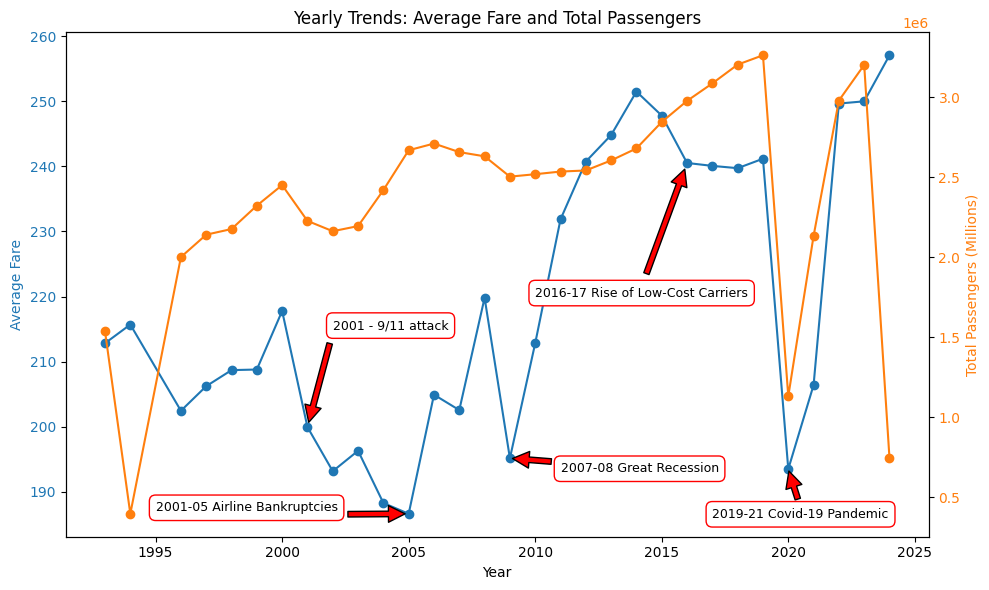

In [ ]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Average Fare on the left y-axis (ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Fare', color='tab:blue')
ax1.plot(yearly_data['Year'], yearly_data['Average_Fare'], color='tab:blue', marker='o', label='Average Fare')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Disable grid for ax1
ax1.grid(False)

# Create a second y-axis (ax2) that shares the same x-axis (Year)
ax2 = ax1.twinx()
ax2.set_ylabel('Total Passengers (Millions)', color='tab:orange')
ax2.plot(yearly_data['Year'], yearly_data['Passengers'], color='tab:orange', marker='o', label='Total Passengers')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Disable grid for ax2
ax2.grid(False)

# Titles
plt.title('Yearly Trends: Average Fare and Total Passengers')

# annotations
ax1.annotate('2001 - 9/11 attack', xy=(2001, yearly_data[yearly_data['Year'] == 2001]['Average_Fare'].values[0]),
             xytext=(2002, 215), arrowprops=dict(facecolor='red', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='red', lw=1), fontsize = 9)

ax1.annotate('2001-05 Airline Bankruptcies', xy=(2005, yearly_data[yearly_data['Year'] == 2005]['Average_Fare'].values[0]),
             xytext=(1995, 187), arrowprops=dict(facecolor='red', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='red', lw=1), fontsize = 9)

ax1.annotate('2016-17 Rise of Low-Cost Carriers', xy=(2016, yearly_data[yearly_data['Year'] == 2016]['Average_Fare'].values[0]),
             xytext=(2010, 220), arrowprops=dict(facecolor='red', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='red', lw=1), fontsize = 9)

ax1.annotate('2019-21 Covid-19 Pandemic', xy=(2020, yearly_data[yearly_data['Year'] == 2020]['Average_Fare'].values[0]),
             xytext=(2017, 186), arrowprops=dict(facecolor='red', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='red', lw=1), fontsize = 9)

ax1.annotate('2007-08 Great Recession', xy=(2009, yearly_data[yearly_data['Year'] == 2009]['Average_Fare'].values[0]),
             xytext=(2011, 193), arrowprops=dict(facecolor='red', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='red', lw=1), fontsize = 9)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()


**2001 - 9/11 Attacks:** The September 11 terrorist attacks had an enormous impact on the US airline industry. The event led to decreased air travel, significant financial losses for airlines, and tighter security measures such as the creation of the TSA (Transportation Security Administration).

**2001-2005 - Airline Bankruptcies:** Following 9/11 and rising fuel costs, several major airlines, including United Airlines (2002) and Delta (2005), filed for bankruptcy. This period saw massive industry restructuring and cost-cutting measures.

**2008 - Great Recession:** The economic downturn led to reduced demand for air travel. Airlines responded by cutting routes, reducing capacity, and merging.

**2010 - Airline Mergers:** The mergers of major airlines, like United and Continental (2010) and Southwest and AirTran (2011), created larger, more consolidated airline entities, impacting competition, fares, and market share.
Source: https://www.airlines.org/dataset/u-s-airline-mergers-and-acquisitions/

**2016-2017 - Rise of Low-Cost Carriers:** Airlines like Spirit, Allegiant, and Frontier saw rapid growth, changing fare structures and increasing competition in certain markets. This period also saw increased attention on customer service issues, with airlines like United experiencing public relations crises.

**2020 - COVID-19 Pandemic:** The global pandemic caused a historic decline in air travel, with US airlines experiencing the worst downturn in history. Airlines grounded large portions of their fleets, reduced staff, and required government bailouts to stay afloat.

Source: https://www.faa.gov/about/history/timeline

### Fare vs Distance Between Airports

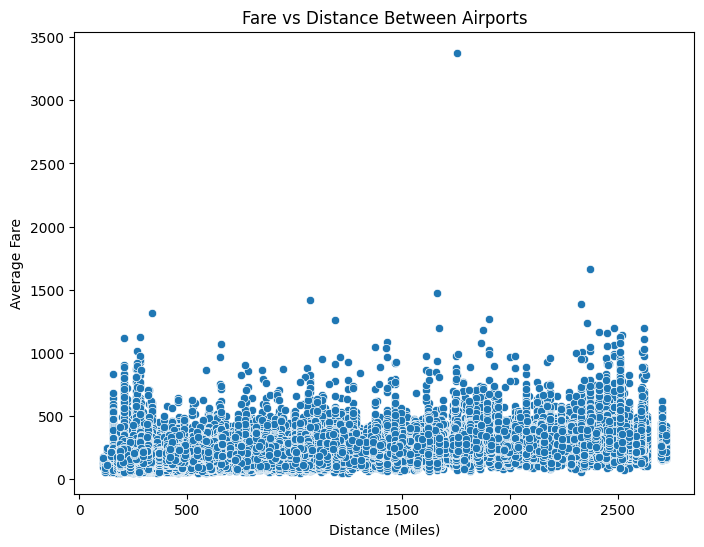

In [ ]:
# Scatter plot for fare vs distance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Distance_Miles', y='Average_Fare')
plt.title('Fare vs Distance Between Airports')
plt.xlabel('Distance (Miles)')
plt.ylabel('Average Fare')
plt.show()



* **Lack of Strong Linear Relationship:** The scatter plot shows that there is not a strong linear relationship between the distance between airports and the average fare. While one might expect fares to increase with distance due to longer travel times and higher fuel costs, this chart suggests that other factors also play a significant role in determining fare prices.



### Distribution of Fares

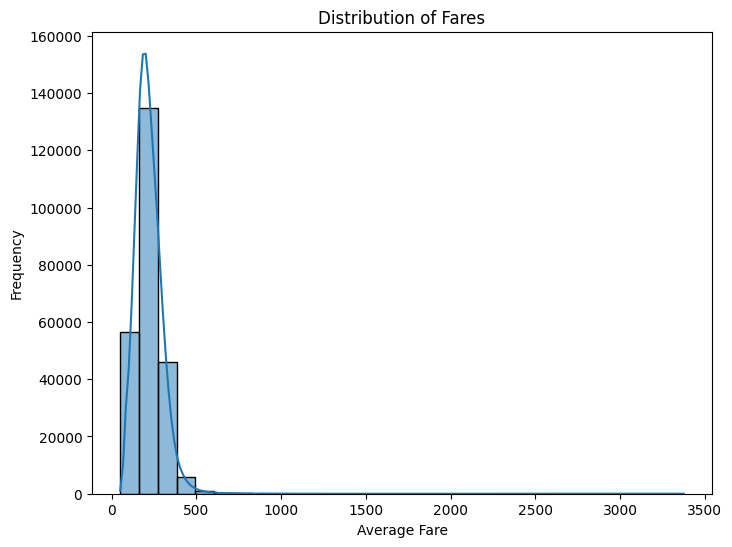

In [ ]:
# Histogram of fare values
plt.figure(figsize=(8, 6))
sns.histplot(df['Average_Fare'], bins=30, kde=True)
plt.title('Distribution of Fares')
plt.xlabel('Average Fare')
plt.ylabel('Frequency')
plt.show()


### Top 10 Routes by Passenger Volume

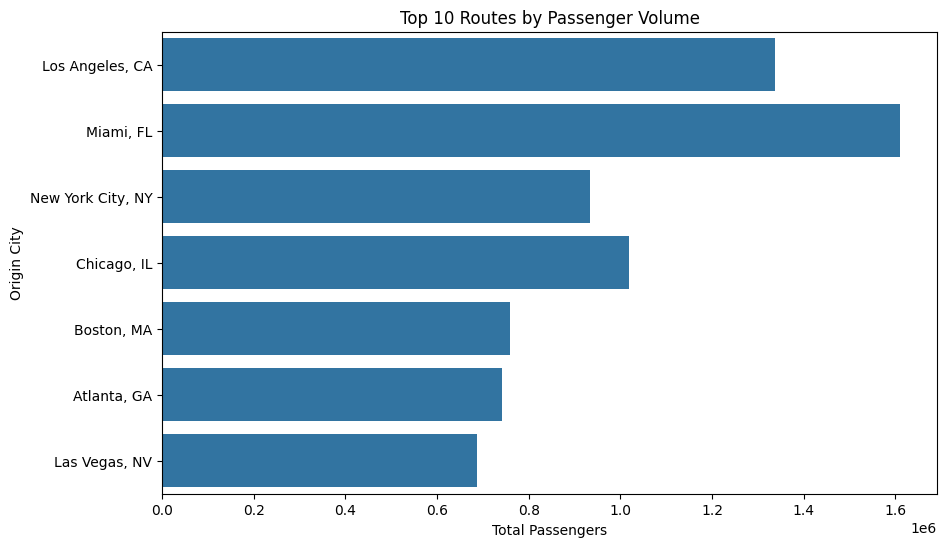

In [ ]:
# Top 10 routes
top_routes = route_data.sort_values(by='Passengers', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Passengers', y='Origin_City', data=top_routes, errorbar=None)  # ci=None removes error bars
plt.title('Top 10 Routes by Passenger Volume')
plt.xlabel('Total Passengers')
plt.ylabel('Origin City')
plt.show()

### Average Fare Across Four Quarters

Is there a seasonal pattern in passenger volume?

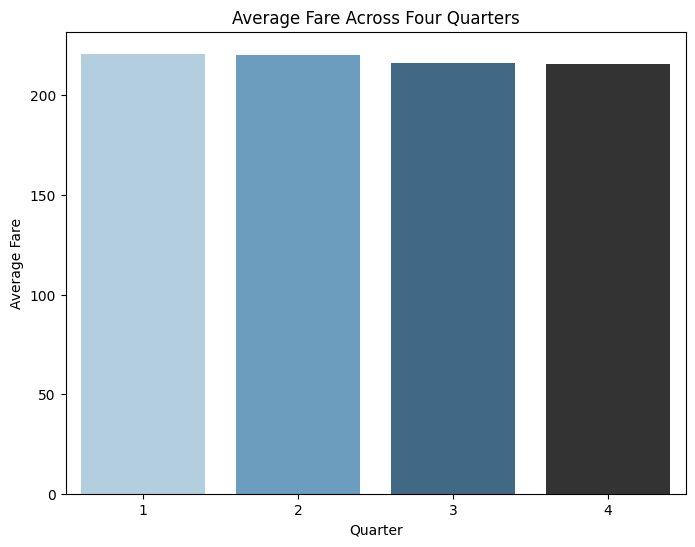

In [ ]:
# Group data by Quarter to calculate the average fare per quarter across all years
quarterly_fare = df.groupby('Quarter').agg({
    'Average_Fare': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Quarter', y='Average_Fare', data=quarterly_fare, palette='Blues_d',hue='Quarter', legend = False)
plt.title('Average Fare Across Four Quarters')
plt.xlabel('Quarter')
plt.ylabel('Average Fare')
plt.show()


### Price Elasticity of Demand

How sensitive are passengers to changes in fares?

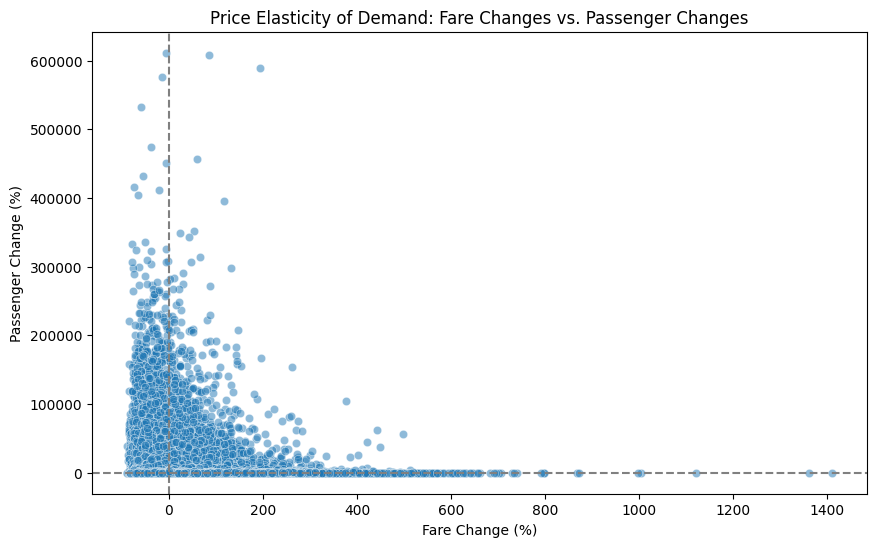

In [ ]:
# Calculate year-over-year percentage change for fare and passenger volume
df['Fare_Change_Percent'] = df['Average_Fare'].pct_change() * 100
df['Passenger_Change_Percent'] = df['Passengers'].pct_change() * 100

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare_Change_Percent', y='Passenger_Change_Percent', data=df, alpha=0.5)
plt.title('Price Elasticity of Demand: Fare Changes vs. Passenger Changes')
plt.xlabel('Fare Change (%)')
plt.ylabel('Passenger Change (%)')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.show()


**Insights:**

* **High Fare Sensitivity at Low Fare Increases:** The majority of data points are concentrated at the lower end of the x-axis (0% to 200% fare change), with a significant spread along the y-axis (passenger change). This indicates that smaller fare changes can lead to substantial fluctuations in passenger numbers, suggesting high price sensitivity among travelers.
* **Diminishing Impact at Higher Fare Changes:** As fare changes increase beyond 200%, the passenger change percentage drops significantly. This trend suggests diminishing sensitivity; once fares increase beyond a certain point, the passenger response becomes less pronounced, possibly due to reaching a threshold where travel becomes too expensive or the passenger base is already limited.



### Average Fare vs. Inflation-Adjusted Fare Over Time

In [ ]:
# CPI data from https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/

cpi_data = {
    1993: 144.5, 1994: 148.2, 1995: 152.4, 1996: 156.9, 1997: 160.5,
    1998: 163.0, 1999: 166.6, 2000: 172.2, 2001: 177.1, 2002: 179.9,
    2003: 184.0, 2004: 188.9, 2005: 195.3, 2006: 201.6, 2007: 207.3,
    2008: 215.3, 2009: 214.5, 2010: 218.1, 2011: 224.9, 2012: 229.6,
    2013: 233.0, 2014: 236.7, 2015: 237.0, 2016: 240.0, 2017: 245.1,
    2018: 251.1, 2019: 255.7, 2020: 258.8, 2021: 271.0, 2022: 292.6,
    2023: 305.0, 2024: 315.0
}

In [ ]:
# base year for adjustment
base_year = 2024
base_year_cpi = cpi_data[base_year]

# New column for inflation-adjusted fare
df['Inflation_Adjusted_Fare'] = df.apply(
    lambda row: row['Average_Fare'] * (base_year_cpi / cpi_data[row['Year']]), axis=1
)

print(df[['Year', 'Average_Fare', 'Inflation_Adjusted_Fare']].head())


   Year  Average_Fare  Inflation_Adjusted_Fare
0  2021         81.43                94.651107
1  2021        208.93               242.852214
2  2021        184.56               214.525461
3  2021        182.64               212.293727
4  2021        177.11               205.865867


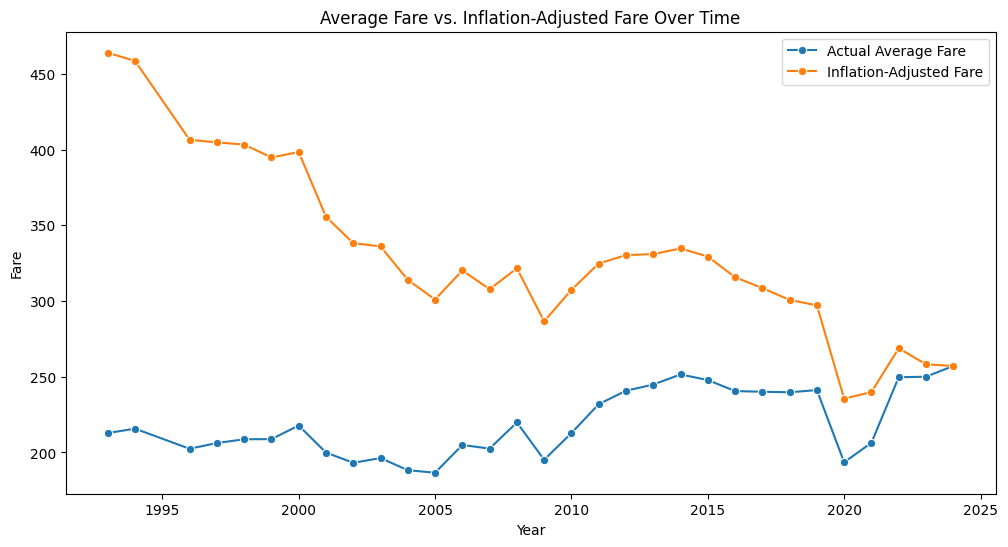

In [ ]:
# Group by Year to calculate average fare and inflation-adjusted fare per year
yearly_inflation_data = df.groupby('Year').agg({
    'Average_Fare': 'mean',
    'Inflation_Adjusted_Fare': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_inflation_data, x='Year', y='Average_Fare', label='Actual Average Fare', marker='o')
sns.lineplot(data=yearly_inflation_data, x='Year', y='Inflation_Adjusted_Fare', label='Inflation-Adjusted Fare', marker='o')
plt.title('Average Fare vs. Inflation-Adjusted Fare Over Time')
plt.xlabel('Year')
plt.ylabel('Fare')
plt.legend()
plt.show()


**Insights:**

*   **In Real Terms, Air Travel Became Cheaper:** Despite the nominal fares (actual average fares) remaining relatively stable or showing minor fluctuations, the real cost of flying (inflation-adjusted) has decreased over time. This means that air travel has become more affordable when accounting for the general rise in prices (inflation) in the economy.
*   **Economic Events Impact on Fares:** Significant dips in both lines around 2020 indicate the impact of global economic events, highlighting how external factors like pandemics can dramatically influence airline pricing strategies.
*   **Price Stability in Nominal Terms:** The relatively stable actual average fare suggests that airlines have maintained their pricing in nominal terms, possibly absorbing some of the inflationary pressures rather than passing them entirely to consumers.